# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline plotting

In [ ]:
%matplotlib inline

## **Upload the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


Load the data

In [ ]:
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Display the first few rows of the dataframe
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


# **Converting & Filtering**

Convertthe date column to datetime format

In [ ]:
data['date'] = pd.to_datetime(data['date'])

Filter data for 'World'

In [ ]:
world_data = data[data['location'] == 'World'].sort_values('date')

Display the filtered data


In [ ]:
world_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
392950,OWID_WRL,NaN,World,2020-01-05,2.0,2.0,NaN,3.0,3.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
392951,OWID_WRL,NaN,World,2020-01-06,2.0,0.0,NaN,3.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
392952,OWID_WRL,NaN,World,2020-01-07,2.0,0.0,NaN,3.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
392953,OWID_WRL,NaN,World,2020-01-08,2.0,0.0,NaN,3.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
392954,OWID_WRL,NaN,World,2020-01-09,2.0,0.0,NaN,3.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


Create a feature for days since the start

In [ ]:
world_data['days_since_start'] = (world_data['date'] - world_data['date'].min()).dt.days
X = world_data[['days_since_start']]
y = world_data['total_deaths'].fillna(0)

Display the engineered features

In [ ]:
world_data[['date', 'days_since_start', 'total_deaths']].head()

,date,days_since_start,total_deaths
392950,2020-01-05,0,3.0
392951,2020-01-06,1,3.0
392952,2020-01-07,2,3.0
392953,2020-01-08,3,3.0
392954,2020-01-09,4,3.0


#**Split the data**

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the shapes of the training and testing sets

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1277, 1), (320, 1), (1277,), (320,))

# ***Training***

Train the Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the training set

In [ ]:
y_train_pred = model.predict(X_train)

Display the model coefficients

In [ ]:
print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

Model Coefficients: [4920.27245711]
Model Intercept: 691138.582627641


# **Predictions**

In [ ]:
y_test_pred = model.predict(X_test)

Calcualte performance metrics

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

Print MSE & R^2

In [ ]:
print(f'Train MSE: {train_mse}, Train R^2: {train_r2}')
print(f'Test MSE: {test_mse}, Test R^2: {test_r2}')

Train MSE: 1351835112971.0276, Train R^2: 0.7930930108379144
Test MSE: 1677510591009.5796, Test R^2: 0.7459357493124392


# **Visualizing**

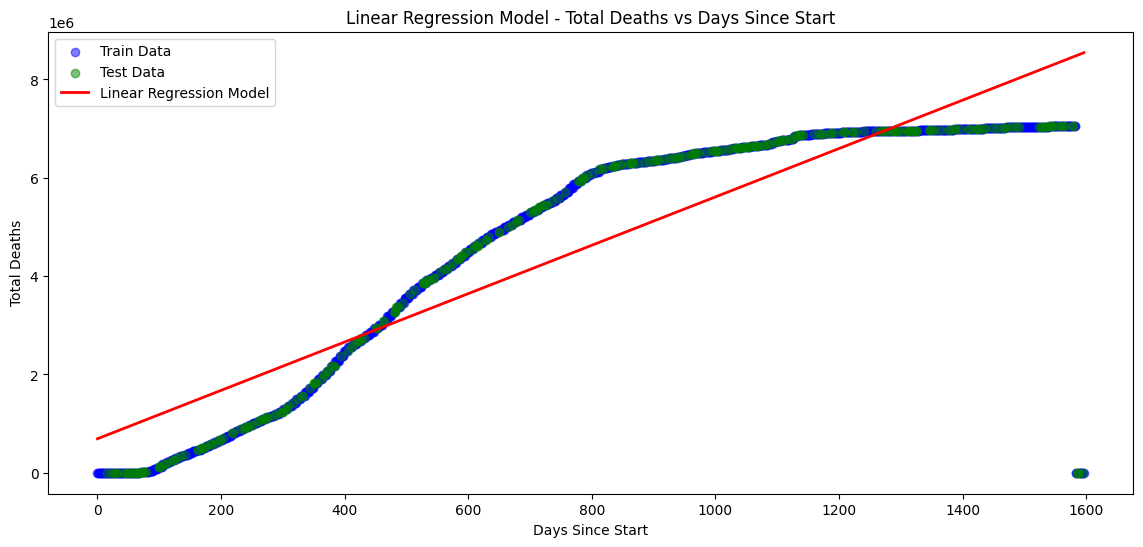

In [ ]:
plt.figure(figsize=(14, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression Model')
plt.xlabel('Days Since Start')
plt.ylabel('Total Deaths')
plt.title('Linear Regression Model - Total Deaths vs Days Since Start')
plt.legend()
plt.show()